# Bài 1 - Làm bài tập Case Study: Forecasting Monthly Sales (trang 190)


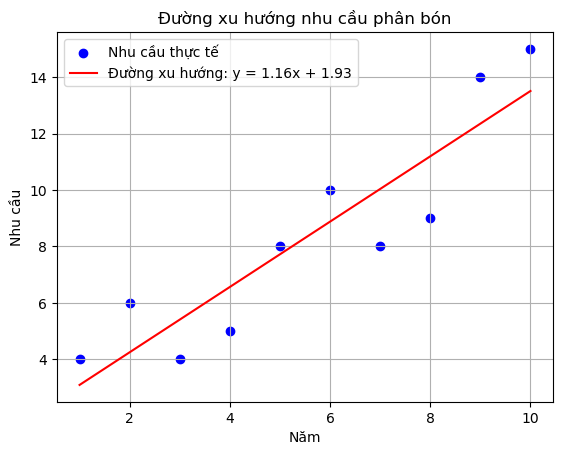

Phương trình đường xu hướng: y = 1.16x + 1.93
Dự báo nhu cầu cho năm 11: 14.67 (1.000 bao)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

years = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
demand = np.array([4, 6, 4, 5, 8, 10, 8, 9, 14, 15])

coeficients = np.polyfit(years, demand, 1)
m, b = coeficients

trend_values = np.polyval(coeficients, years)
forecast_year_11 = np.polyval(coeficients, 11)

plt.scatter(years, demand, color='blue', label='Nhu cầu thực tế')
plt.plot(years, trend_values, color='red', label=f'Đường xu hướng: y = {m:.2f}x + {b:.2f}')
plt.xlabel('Năm')
plt.ylabel('Nhu cầu')
plt.title("Đường xu hướng nhu cầu phân bón")
plt.legend()
plt.grid(True)
plt.show()

print(f"Phương trình đường xu hướng: y = {m:.2f}x + {b:.2f}")
print(f"Dự báo nhu cầu cho năm 11: {forecast_year_11:.2f} (1.000 bao)")


In [2]:
#5-18
alpha= 0.3
gia_tri_gia_dinh = 5.0
forecasts = [gia_tri_gia_dinh]
for t in range(len(demand)):
    if t==0:
       f_t = gia_tri_gia_dinh
    else:
        f_t=alpha*demand[t-1]+(1-alpha)*forecasts[t-1]
    forecasts.append(f_t)
for year, d, f in zip(years, demand, forecasts[1:]):
    print(f"Năm {year}: Nhu cầu thực tế = {d}, Dự báo = {f:.2f}")
print(f"Dự báo cho năm 11: {forecasts[-1]:.2f} (1.000 bao)")

Năm 1: Nhu cầu thực tế = 4, Dự báo = 5.00
Năm 2: Nhu cầu thực tế = 6, Dự báo = 4.70
Năm 3: Nhu cầu thực tế = 4, Dự báo = 5.30
Năm 4: Nhu cầu thực tế = 5, Dự báo = 4.49
Năm 5: Nhu cầu thực tế = 8, Dự báo = 5.21
Năm 6: Nhu cầu thực tế = 10, Dự báo = 5.54
Năm 7: Nhu cầu thực tế = 8, Dự báo = 6.65
Năm 8: Nhu cầu thực tế = 9, Dự báo = 6.28
Năm 9: Nhu cầu thực tế = 14, Dự báo = 7.35
Năm 10: Nhu cầu thực tế = 15, Dự báo = 8.60
Dự báo cho năm 11: 8.60 (1.000 bao)


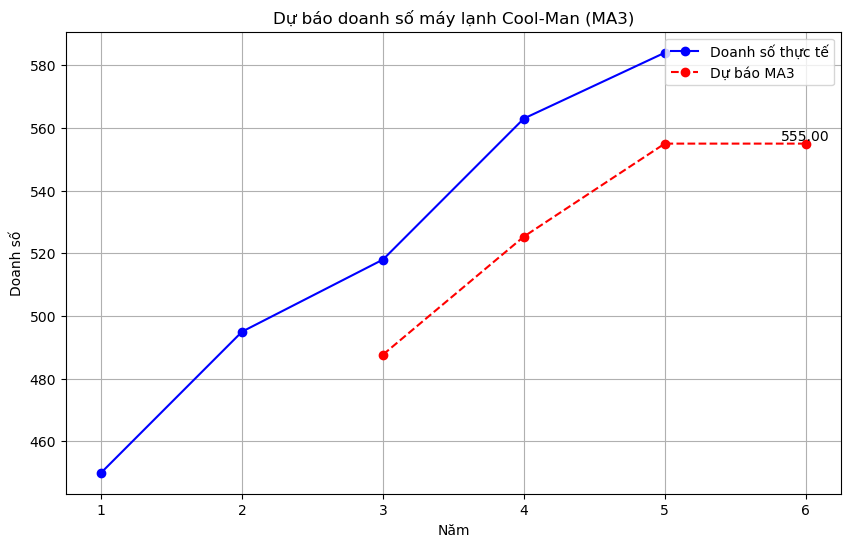

Dự báo trung bình động 3 năm:
Năm 3: Doanh số thực tế = 518, Dự báo = 487.67
Năm 4: Doanh số thực tế = 563, Dự báo = 525.33
Năm 5: Doanh số thực tế = 584, Dự báo = 555.00
Dự báo cho năm 6: 555.00


In [3]:
import numpy as np
import matplotlib.pyplot as plt

years = np.array([1, 2, 3, 4, 5])
sales = np.array([450, 495, 518, 563, 584])
forecasts = []

# Tính MA3 cho các năm có đủ dữ liệu
for i in range(len(sales)):
    if i < 2:
        forecasts.append(None)
    else:
        ma3 = (sales[i-2] + sales[i-1] + sales[i]) / 3
        forecasts.append(ma3)

# Dự báo cho năm thứ 6
forecast_year_6 = (sales[2] + sales[3] + sales[4]) / 3
forecasts.append(forecast_year_6)

years_extended = np.array([1, 2, 3, 4, 5, 6])
forecasts_array = np.array(forecasts)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(years_extended, [sales[i] if i < len(sales) else None for i in range(6)], 
         marker='o', label='Doanh số thực tế', color='blue')
plt.plot(years_extended, forecasts_array, marker='o', label='Dự báo MA3', color='red', linestyle='--')
plt.xlabel('Năm')
plt.ylabel('Doanh số')
plt.title('Dự báo doanh số máy lạnh Cool-Man (MA3)')
plt.legend()
plt.grid(True)

# Hiển thị nhãn cho năm 6
for i in range(len(years_extended)):
    if i >= len(sales):
        plt.text(years_extended[i], forecasts_array[i], f'{forecasts_array[i]:.2f}', 
                 ha='center', va='bottom')

plt.show()

# In kết quả
print("Dự báo trung bình động 3 năm:")
for year, sale, forecast in zip(years, sales, forecasts):
    if forecast is not None:
        print(f"Năm {year}: Doanh số thực tế = {sale}, Dự báo = {forecast:.2f}")
print(f"Dự báo cho năm 6: {forecast_year_6:.2f}")


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
data = {
    "Month": ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]*3,
    "Year": [2008]*12 + [2009]*12 + [2010]*12,
    "Revenue": [
        438,420,414,318,306,240,240,216,198,225,270,315, # 2008
        444,425,423,331,318,245,255,223,210,233,278,322, # 2009
        450,438,434,338,331,254,264,231,224,243,289,335  # 2010
    ]
}
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"] + "-01")

df = df.sort_values("Date").set_index("Date")
df

,Month,Year,Revenue
Date,,,
2008-01-01,Jan,2008,438
2008-02-01,Feb,2008,420
2008-03-01,Mar,2008,414
2008-04-01,Apr,2008,318
2008-05-01,May,2008,306
2008-06-01,Jun,2008,240
2008-07-01,Jul,2008,240
2008-08-01,Aug,2008,216
2008-09-01,Sep,2008,198


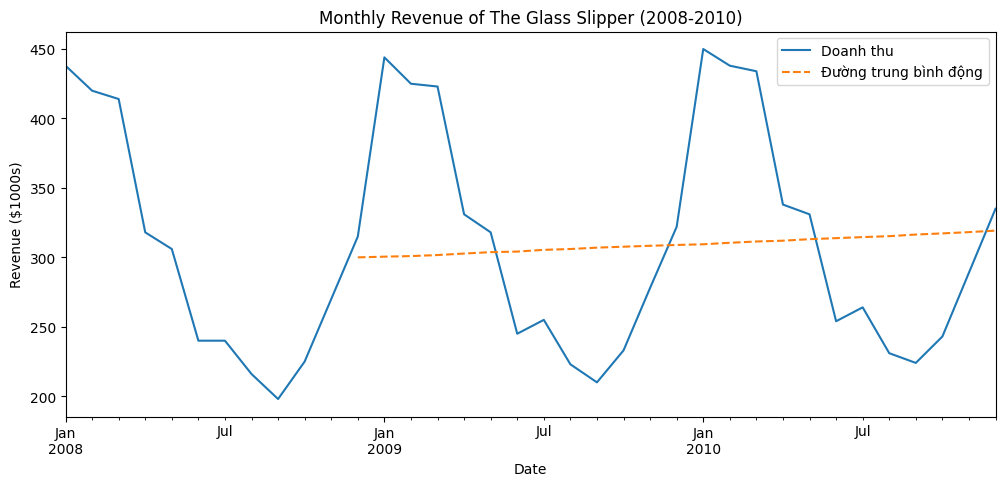

In [48]:
# Vẽ biểu đồ + đường trung bình động
df["Revenue"].plot(figsize=(12,5), label="Doanh thu")
df["Revenue"].rolling(window=12).mean().plot(label="Đường trung bình động", linestyle="--")
plt.title("Monthly Revenue of The Glass Slipper (2008-2010)")
plt.xlabel("Date")
plt.ylabel("Revenue ($1000s)")
plt.legend()
plt.show()


In [49]:
# hồi quy tuyến tính để dự báo doanh thu cho năm tiếp theo
X = np.arange(len(df)).reshape(-1,1)
y = df["Revenue"].values
model = LinearRegression()
model.fit(X, y)

# 12 tháng next 
future_X = np.arange(len(df), len(df)+12).reshape(-1,1)
future_pred = model.predict(future_X)

print("Dự báo doanh thu bằng hồi quy tuyến tính (2011):")
for i, val in enumerate(future_pred, start=1):
    print(f"Tháng {i}: {val:.1f}")

Dự báo doanh thu bằng hồi quy tuyến tính (2011):
Tháng 1: 287.9
Tháng 2: 286.7
Tháng 3: 285.6
Tháng 4: 284.4
Tháng 5: 283.2
Tháng 6: 282.1
Tháng 7: 280.9
Tháng 8: 279.8
Tháng 9: 278.6
Tháng 10: 277.4
Tháng 11: 276.3
Tháng 12: 275.1


C:\Users\HP\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:891: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
C:\Users\HP\AppData\Local\Temp\ipykernel_17976\3430634976.py:3: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(pd.date_range("2011-01-01", periods=12, freq="M"), future_pred_reg,


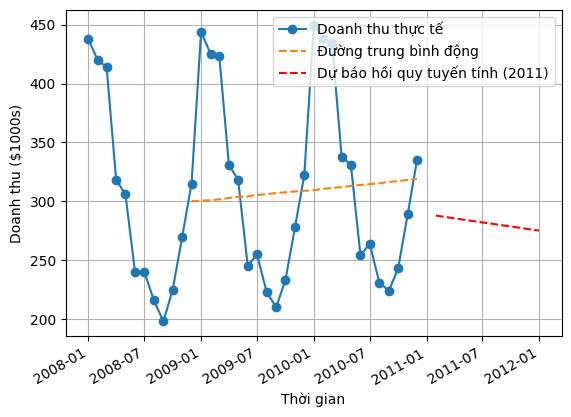

In [52]:

plt.plot(df.index, df["Revenue"], label="Doanh thu thực tế", marker="o")
df["Revenue"].rolling(window=12).mean().plot(label="Đường trung bình động", linestyle="--")
plt.plot(pd.date_range("2011-01-01", periods=12, freq="M"), future_pred_reg, 
         label="Dự báo hồi quy tuyến tính (2011)", color="red", linestyle="--")
plt.xlabel("Thời gian")
plt.ylabel("Doanh thu ($1000s)")
plt.legend()
plt.grid(True)
plt.show()

Độ dốc của đường hồi quy không nhất quán với xu hướng nhận thấy ở câu 1.  
Vì ảnh hưởng mùa vụ mạnh: Doanh thu rất cao vào tháng 1–3 (mùa trượt tuyết), nhưng lại rất thấp vào tháng 6–8. Khi ghép cả chuỗi 36 tháng, các giá trị thấp mùa hè kéo đường hồi quy đi xuống.  

Hồi quy tuyến tính chỉ “ép” một đường thẳng để mô tả dữ liệu → nó không thể tách được xu hướng (trend) và mùa vụ (seasonality).  

Trung bình động đã “làm mượt” dữ liệu và giảm tác động mùa vụ, nên nó phản ánh đúng hơn xu hướng tăng thực tế.

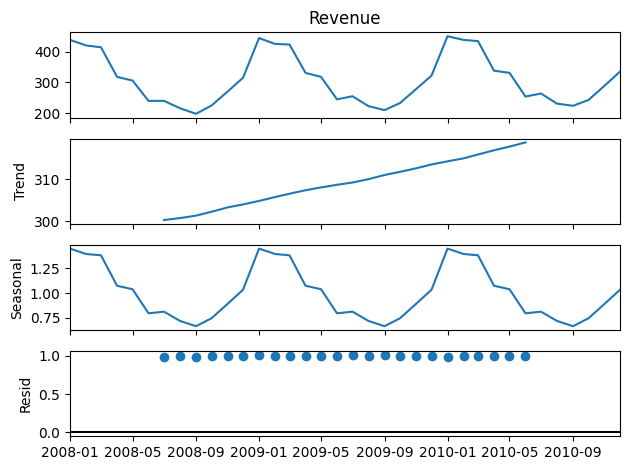


Dự báo doanh thu bằng Multiplicative Decomposition (2011):
Tháng 1: 454.0 
Tháng 2: 437.1 
Tháng 3: 432.9 
Tháng 4: 336.9 
Tháng 5: 326.0 
Tháng 6: 250.0 
Tháng 7: 255.2 
Tháng 8: 226.0 
Tháng 9: 209.4 
Tháng 10: 234.5 
Tháng 11: 279.7 
Tháng 12: 324.3 


In [56]:
#mô hình phân rã nhân (multiplicative decomposition)
result = seasonal_decompose(df["Revenue"], model="multiplicative", period=12)

result.plot()
plt.show()

trend = result.trend.dropna()
seasonal = result.seasonal
avg_seasonal = seasonal.groupby(seasonal.index.month).mean()

last_trend = trend[-12:].mean()  
forecast_md = []
for m in range(1,13):
    forecast_md.append(last_trend * avg_seasonal[m])

print("\nDự báo doanh thu bằng Multiplicative Decomposition (2011):")
for i, val in enumerate(forecast_md, start=1):
    print(f"Tháng {i}: {val:.1f} ")


Phân rã nhân: Giữ lại cả xu hướng tăng và chu kỳ mùa vụ, nên dự báo chi tiết hơn (ví dụ tháng 1 cao, tháng 7 thấp)

# Bài 2 - Tìm hiểu nội dung ARIMA. Tìm một bộ dữ liệu và trình bày vào file notebook.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [44]:
df = pd.read_csv("Data_Bicycle_Counter.csv")
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0
...,...,...,...,...
135609,08/31/2020 07:00:00 PM,190.0,79.0,111.0
135610,08/31/2020 08:00:00 PM,108.0,58.0,50.0
135611,08/31/2020 09:00:00 PM,33.0,11.0,22.0
135612,08/31/2020 10:00:00 PM,36.0,14.0,22.0


In [46]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y %I:%M:%S %p")
df.set_index('Date', inplace=True)

ts = df['Fremont Bridge Total']
monthly = ts.resample('ME').sum()

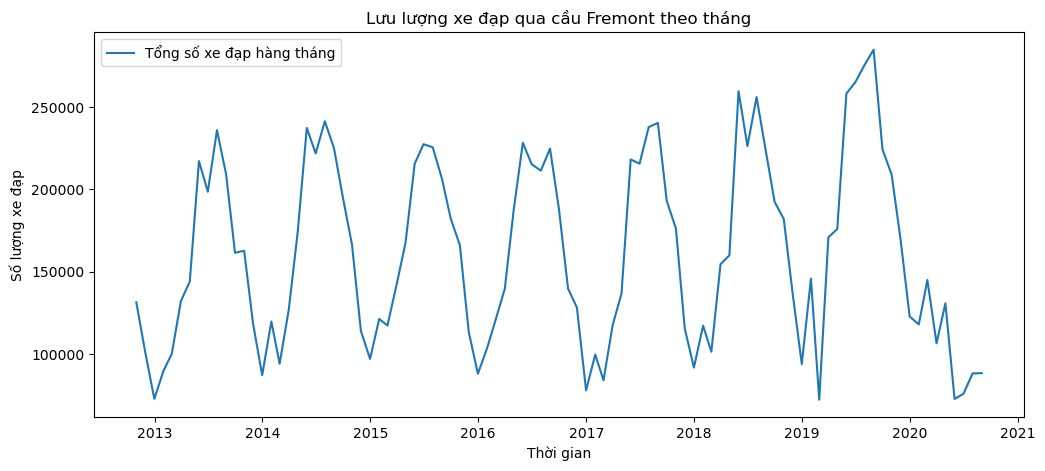

In [40]:
plt.figure(figsize=(12,5))
plt.plot(monthly, label="Tổng số xe đạp hàng tháng")
plt.title("Lưu lượng xe đạp qua cầu Fremont theo tháng")
plt.xlabel("Thời gian")
plt.ylabel("Số lượng xe đạp")
plt.legend()
plt.show()

In [ ]:
#Kiểm định tính dừng
result = adfuller(monthly.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

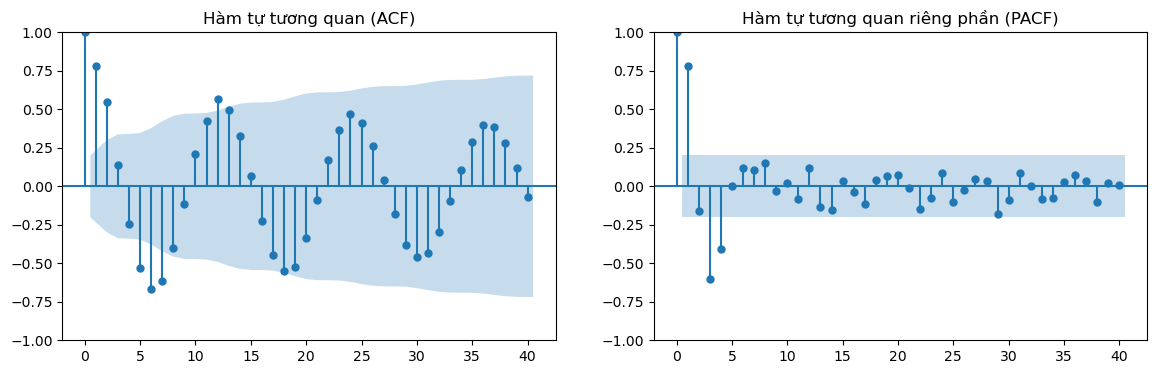

In [48]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
plot_acf(monthly.dropna(), ax=ax[0], lags=40)
ax[0].set_title("Hàm tự tương quan (ACF)")
plot_pacf(monthly.dropna(), ax=ax[1], lags=40)
ax[1].set_title("Hàm tự tương quan riêng phần (PACF)")
plt.show()

In [56]:
#Model
model = ARIMA(monthly, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:     Fremont Bridge Total   No. Observations:                   95
Model:                   ARIMA(1, 1, 1)   Log Likelihood               -1121.051
Date:                  Mon, 29 Sep 2025   AIC                           2248.102
Time:                          20:12:35   BIC                           2255.732
Sample:                      10-31-2012   HQIC                          2251.184
                           - 08-31-2020                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7600      0.394     -1.929      0.054      -1.532       0.012
ma.L1          0.6754      0.458      1.475      0.140      -0.222       1.573
sigma2      1.398e+09   4.67e-11   2

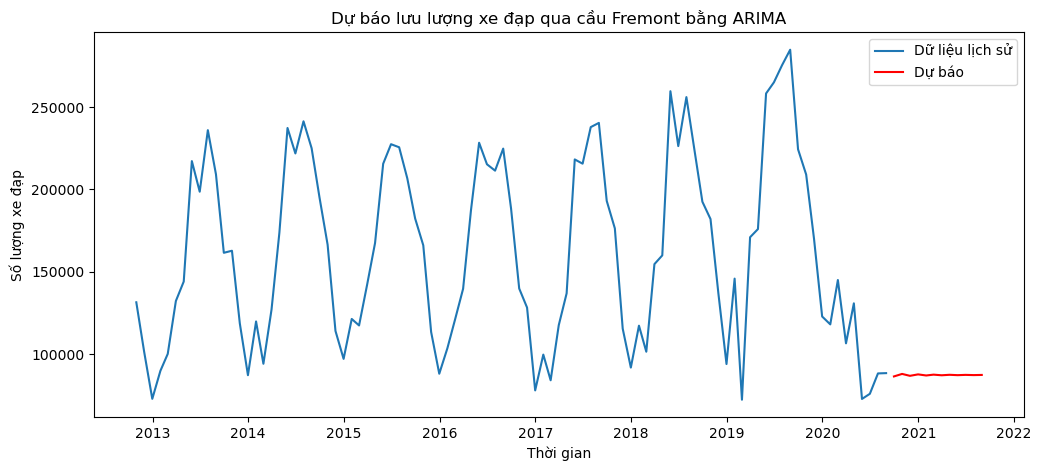

In [58]:
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(12,5))
plt.plot(monthly, label="Dữ liệu lịch sử")
plt.plot(forecast, label="Dự báo", color='red')
plt.title("Dự báo lưu lượng xe đạp qua cầu Fremont bằng ARIMA")
plt.xlabel("Thời gian")
plt.ylabel("Số lượng xe đạp")
plt.legend()
plt.show()

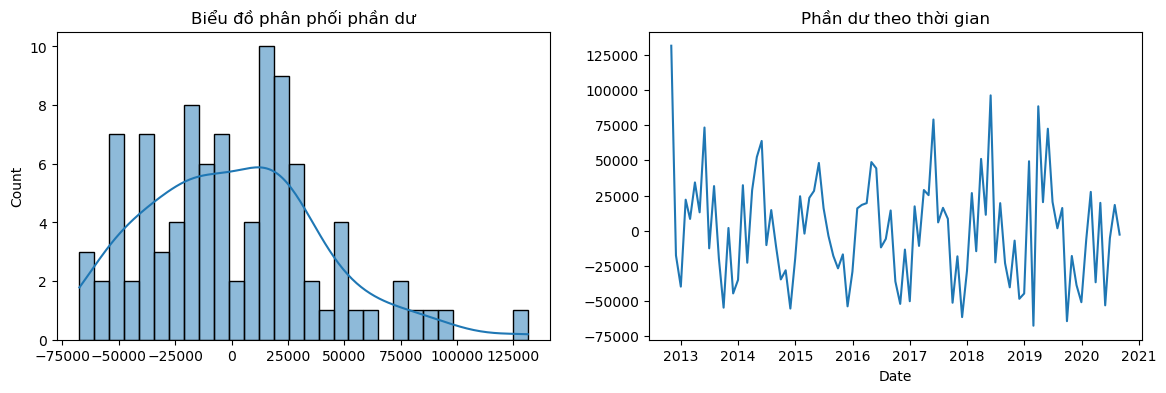

In [60]:
residuals = model_fit.resid
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.histplot(residuals, bins=30, ax=ax[0], kde=True)
ax[0].set_title("Biểu đồ phân phối phần dư")
sns.lineplot(x=residuals.index, y=residuals.values, ax=ax[1])
ax[1].set_title("Phần dư theo thời gian")
plt.show()